# Exploring eBay car sales data

The dataset analized here is from eBay Kleinanzeigen, a classifieds section of the German eBay website. The aim of this project is to clean the data and analyze the included used car listings.

The data dictionary provided with data is as follows:
- dateCrawled: when this ad was first crawled.
- name: name of the car.
- seller: whether the seller is private or a dealer.
- offerType: the type of listing.
- price: the price on the ad to sell the car.
- abtest: whether the listing is included in an A/B test.
- vehicleType: the vehicle type.
- yearOfRegistration: the year in which the car was first registered.
- gearbok: the transmission type.
- powerPS: the power of the car in PS.
- model: the car model name.
- kilometer: how many kilometers the car has driven.
- monthOfRegistration: the month in which the car was first registered.
- fuelType: What type of fuel the car uses.
- brand: the brand of the car.
- notRepairedDamage: if the car has a damage which is not yet repaired.
- nrOfPictures: the number of pictures in the ad.
- postalCode: the postal code for the location of the vehicle.
- lastSeenOnline: when the crawler saw this ad last online.

In [1]:
#importing libraries and reading csv file.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [37]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

The dataset contains 20 columns, some of them have null values, but none have more than 20%.


# Renaming, converting and dropping columns
Because the columns names are in camelcase, I converted them to snakecase and reword some of the names to be more descriptive.

In [4]:
cols = autos.columns
cols 

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [6]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In the next step, I did some basic data exploration to determine if there are columns that had to be converted or dropped.

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


There are two columns with almost same values, 'seller' and 'offer_type'. The column of 'nr_of_pictures' will need to be investigated.

In [8]:
autos['nr_of_pictures'].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

Apparently, all values in 'nr_of_pictures' are equal to 0. We'll drop this column with the other two we've mentioned earlier ('seller' and 'offer_type').

In [9]:
autos = autos.drop(["nr_of_pictures", "seller", "offer_type"], axis=1)

There are two columns, 'price' and 'odometer', which we need to store as a numerical type instead of string type. The first step is remove any non-numeric characters and then convert them.

In [10]:
autos['price'] = (autos['price']
                      .str.replace(',', '')
                      .str.replace('$', '')
                      .astype(int)
                 )
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [11]:
autos['odometer'] = (autos['odometer']
                         .str.replace('km', '')
                         .str.replace(',', '')
                         .astype(int)
                    )
autos.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)
autos['odometer_km'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

# Analizing odometer and price columns

In [12]:
autos['odometer_km'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

The values from the odometer_km column are rounded, which might indicate that sellers had to choose from preset options. In addition, we can find there are higher mileages than lower ones.

In [13]:
autos['price'].unique().shape

(2357,)

In [14]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [15]:
autos["price"].value_counts().head(20)

0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: price, dtype: int64

Those prices seem to be rounded like the results of the previous analysis, but now we have  2357 unique values. It could be people's tendency to round prices in the site.
If we look closer, we can notice that there are 1421 cars listed with \$0. It only represents 2% of total listed cars, we should consider removing those rows from our analysis. Let's take a look at the minimum and maximum prices.

In [16]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [17]:
autos["price"].value_counts().sort_index(ascending=True).head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

If we look at maximum prices, we can find a few of them are way expensive in comparison with those below \\$350000. We're going to take this number as our maximum price. About minimum prices, there are listed cars below \$30, but given that eBay is an auction site, there could legitimately be items where the opening bid is \\$1. As we said before, we're going to only drop items listed at \\$0.

In [18]:
autos = autos[autos["price"].between(1,351000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

Now our price data is clean and more readable than before. We can find reasonable values for mean and std. 

# Exploring the date columns

There are 5 columns refered to date information:
- date_crawled
- last_seen
- ad_created
- registration_month
- registration_year

These are a combination of dates that were crawled, and dates with meta-information from the crawler. The non-registration dates are stored as strings.

Let's explore the data to understand more about them.

In [19]:
autos[['date_crawled', 'ad_created', 'last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [20]:
(autos['date_crawled']
     .str[:10]
     .value_counts(normalize=True, dropna=False)
     .sort_index()
)

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

In [21]:
(autos['date_crawled']
     .str[:10]
     .value_counts(normalize=True, dropna=False)
     .sort_values()
)

2016-04-07    0.001400
2016-04-06    0.003171
2016-03-18    0.012911
2016-04-05    0.013096
2016-03-06    0.014043
2016-03-13    0.015670
2016-03-05    0.025327
2016-03-24    0.029342
2016-03-16    0.029610
2016-03-27    0.031092
2016-03-25    0.031607
2016-03-17    0.031628
2016-03-31    0.031834
2016-03-10    0.032184
2016-03-26    0.032204
2016-03-23    0.032225
2016-03-11    0.032575
2016-03-22    0.032987
2016-03-09    0.033090
2016-03-08    0.033296
2016-03-30    0.033687
2016-04-01    0.033687
2016-03-29    0.034099
2016-03-15    0.034284
2016-03-19    0.034778
2016-03-28    0.034860
2016-04-02    0.035478
2016-03-07    0.036014
2016-04-04    0.036487
2016-03-14    0.036549
2016-03-12    0.036920
2016-03-21    0.037373
2016-03-20    0.037887
2016-04-03    0.038608
Name: date_crawled, dtype: float64

I sorted the lists by dates and counts. We can observe the distribution of listings crawled on each day is roughly uniform.

In [22]:
(autos['last_seen']
     .str[:10]
     .value_counts(normalize=True, dropna=False)
     .sort_index()
)

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The crawler recorded the date it last saw any listing and put that value on the last_seen column. It allows us to determinate in which day it was removed, presumably because the car was sold. We can notice the last 3 days has a bigger amount of values than previous days. It doesn't mean there was a spike in sales, it's more likely the crawling period was ending.

In [23]:
(autos['ad_created']
     .str[:10]
     .value_counts(normalize=True, dropna=False)
     .sort_index()
)

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

There is a large variety of ad created dates. Most of them fall in March and first days of April in 2016. We also have quite old dates, with the oldest one on June 2015.

In [24]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The registration_year column has wrong values. For example, the minimum value reflects that we have a car registered in year 1000 and the maximum value is 9999, many years into the future. 

# Cleaning registration year data

The most recent year in this column can't be higher than 2016, because it doesn't make sense. Determining the earliest valid year is more difficult. It could be somewhere in the 1900s. We could remove data outside those parameters if they don't represent a significant amount of our data.

In [25]:
(~autos["registration_year"].between(1900,2016)).sum() / autos.shape[0]

0.038793369710697

Given that this is less than 4% of our data, we will remove these rows.

In [26]:
autos = autos[autos["registration_year"].between(1900,2016)]
autos["registration_year"].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

The most common values for registration year lay on lately 20 years.

# Exploring brands

In [27]:
autos['brand'].value_counts(normalize=True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

German manufacturers represent four out of the top five brands, almost 50% of the overall listings. The most popular brand of our list is Volkswagen, which owns 21% of our list.

There are a lot of car brands but only a few of them have a significant percentage of listings, so we will take for analysis those brands who represent 5% of listings at least.

In [28]:
brands = autos['brand'].value_counts(normalize=True)

In [29]:
top_brands = brands[brands > 0.05].index
top_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [30]:
agg_brands = {}

for b in top_brands:
    brand_only = autos[autos['brand'] == b]
    mean_price = brand_only['price'].mean()
    agg_brands[b] = int(mean_price)
agg_brands

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

We can find some insights in price gap:
- Audi, BMW, and Mercedes Benz are more expensive
- Ford and Opel are less expensive, sort of entry-level brands.
- Volkswagen is a midterm, which could be the reason for his popularity.

# Exploring mileage
For the top 6 brands, I used aggregation to understand the average mileage for those cars and if there's any visible link with mean price.

In [31]:
agg_mileage = {}

for b in top_brands:
    brand_only = autos[autos['brand'] == b]
    mean_mileage = brand_only['odometer_km'].mean()
    agg_mileage[b] = int(mean_mileage)

In [32]:
mean_price = pd.Series(agg_brands).sort_values(ascending=False)
mean_mileage = pd.Series(agg_mileage).sort_values(ascending=False)

In [33]:
brand_df = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_df

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [34]:
brand_df['mean_price'] = mean_price
brand_df

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


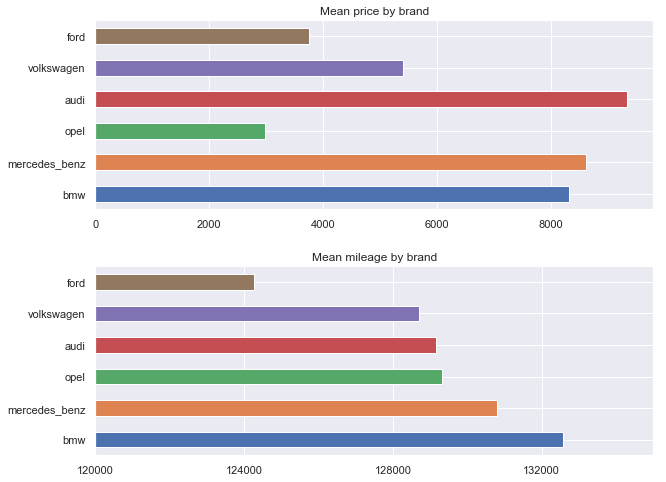

In [35]:
fig, axes = plt.subplots(2,1,figsize=(10,8))
ax1, ax2 = axes.flatten()
fig.subplots_adjust(hspace=.3, wspace=.3)

brand_df['mean_price'].plot.barh(ax=ax1,
                                title='Mean price by brand')

brand_df['mean_mileage'].plot.barh(ax=ax2,
                                  title= 'Mean mileage by brand')
plt.xlim(120000, 135000)
plt.xticks(np.arange(120000, 135000, step=4000))
plt.show()

The range of car mileages does not vary as much as the prices do by brand, instead all falling within 10% for the top brands. There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.